In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pymongo
from datetime import datetime
import json 
import talib as ta
import math

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["stoccs"]
print("ok")

ok


[*********************100%***********************]  1 of 1 completed


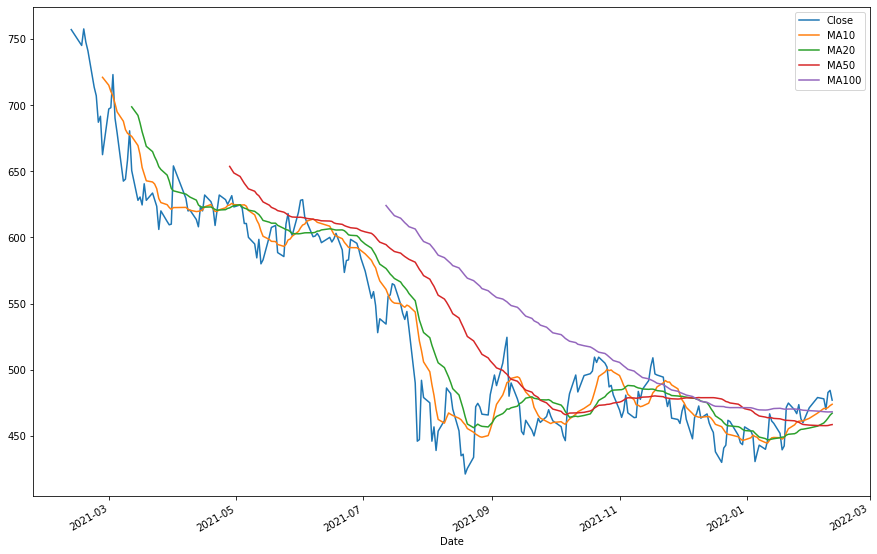

In [46]:
mycol = mydb["data"]

ticker = yf.download("0700.hk", period = "1y")

ticker['MA10'] = ta.SMA(ticker['Close'], timeperiod=10)
ticker['MA20'] = ta.SMA(ticker['Close'], timeperiod=20)
ticker['MA50'] = ta.SMA(ticker['Close'], timeperiod=50)
ticker['MA100'] = ta.SMA(ticker['Close'], timeperiod=100)
ticker[['Close','MA10', 'MA20', 'MA50', 'MA100']].plot(figsize=(15, 10))
plt.show()

In [42]:
mycol = mydb["data"]

ticker = yf.download("0700.hk", period = "1y")

ticker['MA10'] = ta.SMA(ticker['Close'], timeperiod=10)
ticker['MA20'] = ta.SMA(ticker['Close'], timeperiod=20)
ticker['MA50'] = ta.SMA(ticker['Close'], timeperiod=50)

tickerloc = -1
prevclose = 0

for ma20 in ticker['MA20']:
    tickerloc += 1
    if not math.isnan(ma20):
        if ma20 < ticker['MA10'][tickerloc]:
            if action == "B":
                pass
            else: 
                action = "B"
                print(f"{list(ticker.index)[tickerloc]}: {round(ma20, 3)}, {round(ticker['MA10'][tickerloc], 3)}, {action}, {round(ticker['Close'][tickerloc], 3)-prevclose}")
                prevclose = round(ticker['Close'][tickerloc], 3)
        elif ma20 > ticker['MA10'][tickerloc]:
            if action == "S":
                pass
            else:
                action = "S"
                print(f"{list(ticker.index)[tickerloc]}: {round(ma20, 3)}, {round(ticker['MA10'][tickerloc], 3)}, {action}, {round(ticker['Close'][tickerloc], 3)-prevclose}")
                prevclose = round(ticker['Close'][tickerloc], 3)


[*********************100%***********************]  1 of 1 completed
2021-03-12 00:00:00: 698.625, 676.3, S, 650.5
2021-04-16 00:00:00: 622.85, 623.1, B, -18.5
2021-04-20 00:00:00: 622.075, 621.65, S, -9.5
2021-04-23 00:00:00: 620.675, 620.85, B, 9.5
2021-05-03 00:00:00: 624.65, 624.5, S, -7.5
2021-05-04 00:00:00: 623.05, 624.45, B, -2.5
2021-05-07 00:00:00: 620.6, 620.35, S, -22.0
2021-05-31 00:00:00: 602.675, 604.5, B, 19.0
2021-06-16 00:00:00: 606.275, 605.3, S, -22.5
2021-09-02 00:00:00: 462.96, 467.54, B, -100.5
2021-09-20 00:00:00: 479.52, 478.12, S, -41.80000000000001
2021-10-11 00:00:00: 464.9, 466.34, B, 41.80000000000001
2021-11-04 00:00:00: 487.075, 485.61, S, -15.199999999999989
2021-11-19 00:00:00: 484.215, 487.03, B, 15.199999999999989
2021-12-01 00:00:00: 479.905, 477.24, S, -27.19999999999999
2022-01-13 00:00:00: 447.552, 448.545, B, -7.569999999999993
2022-01-18 00:00:00: 449.067, 447.573, S, -21.74200000000002
2022-01-20 00:00:00: 450.577, 452.213, B, 32.1120000000000

In [ ]:
mycol = mydb["data"]

ticker = yf.download("FB", period = "1y")

ticker['MA10'] = ta.SMA(ticker['Close'], timeperiod=10)
ticker['MA20'] = ta.SMA(ticker['Close'], timeperiod=20)
ticker['MA50'] = ta.SMA(ticker['Close'], timeperiod=50)

list(ticker.index)